# Supervised evaluation

In [1]:
import sys
sys.path.append("/Users/alessiogandelli/dev/internship/BERTopic_evaluation/src/utils")
from supervised import Supervised
from supervised import get_test_dataset

2023-03-22 18:23:40.778399: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Dataset 
The supervised dataset is a collection of tweets that have been extracted according to their hashtag, in the first exmaple we have bitcoin, ukrainian war, formula1, trump and climatechange. The tweets are in a folder and each topic should be in a jsonl file with the name of the topic. The jsonl data have been ectracted using twarc2.

Then two version of the same dataset have been created, one with the original tweets and one with the tweets without the hashtags.

In [18]:
df = get_test_dataset('./../../data/simple_supervised/')
df_no_hash = df.copy()
df_no_hash['text'] = df_no_hash['text'].str.replace(r'#\S+', '', case=False)

getting dataset


# Evaluation

using the Supervised class, we can evaluate the dataset using different models, the accepted one are 
- NMF  
- Bertopic with openai embeddings 
- Bertopic with any sentence transformer embeddings model (https://huggingface.co/sentence-transformers)



In [19]:
tweetclass = Supervised(df, 'louisbetsch/tweetclassification-bf-model')
nmf = Supervised(df, 'NMF')
bert = Supervised(df, 'all-MiniLM-L6-v2')
openai_eval = Supervised(df, 'openai')



evaluate louisbetsch/tweetclassification-bf-model
topic share is too low, proprablt accuracy is not meaningful for  0
check the heatmap 
topic share is too low, proprablt accuracy is not meaningful for  0
check the heatmap 
evaluate NMF
topic share is too low, proprablt accuracy is not meaningful for  0
check the heatmap 
evaluate all-MiniLM-L6-v2
evaluate openai


<AxesSubplot: >

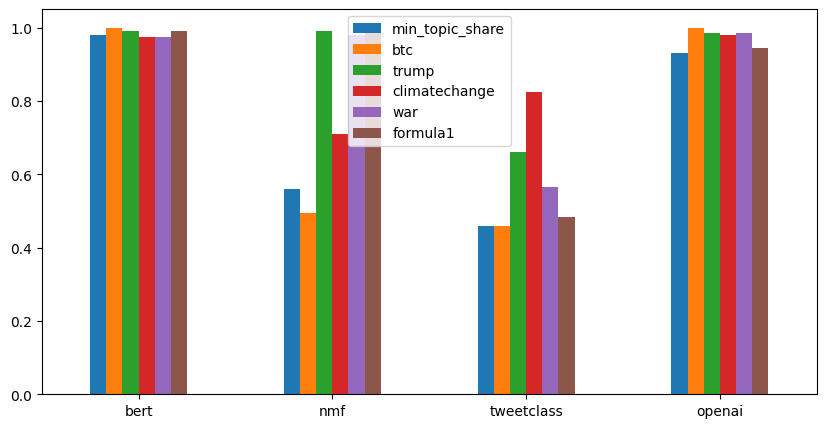

In [21]:
import pandas as pd 

pd.DataFrame({'bert': bert.accuracy, 'nmf': nmf.accuracy, 'tweetclass': tweetclass.accuracy, 'openai': openai_eval.accuracy}).T.plot.bar(rot=0, figsize=(10,5))

In [20]:
#%%
#bert = Supervised(df, 'all-MiniLM-L6-v2')
#openai_eval = Supervised(df, 'openai')

bert_no_hash = Supervised(df_no_hash, 'all-MiniLM-L6-v2')
openai_no_hash = Supervised(df_no_hash, 'openai')
nmf_no_hash = Supervised(df_no_hash, 'NMF')
tc_no_hash = Supervised(df_no_hash, "louisbetsch/tweetclassification-bf-model" )



evaluate all-MiniLM-L6-v2
topic share is too low, proprablt accuracy is not meaningful for  0
check the heatmap 
topic share is too low, proprablt accuracy is not meaningful for  0
check the heatmap 
evaluate openai
topic share is too low, proprablt accuracy is not meaningful for  0
check the heatmap 
topic share is too low, proprablt accuracy is not meaningful for  0
check the heatmap 
evaluate NMF
topic share is too low, proprablt accuracy is not meaningful for  0
check the heatmap 
evaluate louisbetsch/tweetclassification-bf-model
topic share is too low, proprablt accuracy is not meaningful for  0
check the heatmap 
topic share is too low, proprablt accuracy is not meaningful for  0
check the heatmap 


In [24]:
import pandas as pd

df_no_hash = pd.DataFrame({
                'bert': bert_no_hash.accuracy, 
                'openai': openai_no_hash.accuracy, 
                'bertno_outliers': bert_no_hash.accuracy_no_outliers, 
                'openaino_outliers': openai_no_hash.accuracy_no_outliers,
                'NMF': nmf_no_hash.accuracy,
                'tweetclass': tc_no_hash.accuracy})

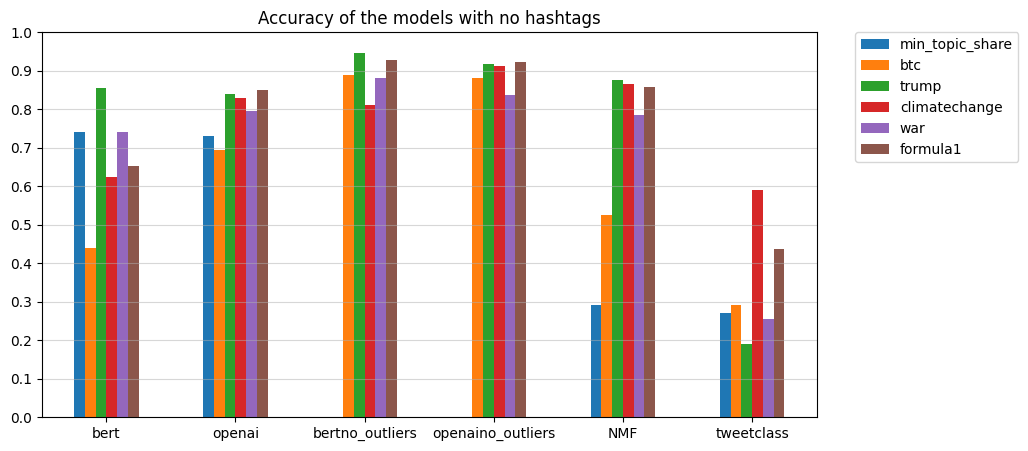

In [25]:
# barplot grouped by column
import matplotlib.pyplot as plt
import numpy as np

df_no_hash.T.plot.bar(rot=0, figsize=(10,5))

#add title
plt.title('Accuracy of the models with no hashtags')

#add grid every 0.1
plt.grid(axis='y', alpha=0.5)

#add yticks every 0.1
plt.yticks(np.arange(0, 1.1, 0.1))

# legend outside 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

            

<AxesSubplot: xlabel='my_topics', ylabel='topic'>

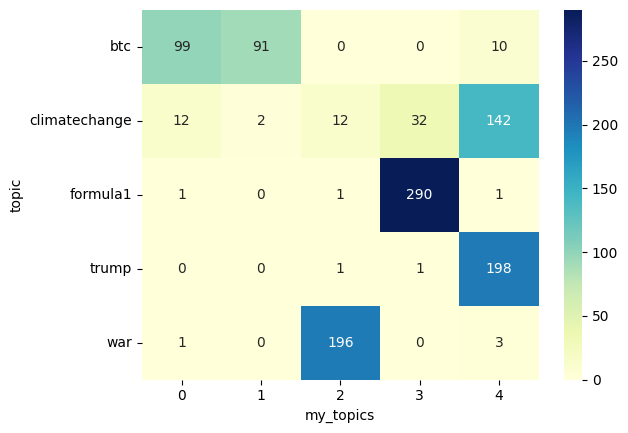

In [27]:
nmf.visualize_heatmap()

In [28]:
openai_no_hash.visualize_documents()

In [29]:
bert_no_hash.visualize_documents()

# outliers


In [32]:
openai_no_hash.df[openai_no_hash.df['my_topics'] == -1]['text'].value_counts()

@APompliano Look no fuher than @RainmakerGaming. Their games are engaging, fun, and can earn you huge  rewards. Token $RAIN also in popularity these days.                       12
Hello dear,Are you looking for Expe Graphic Designer? I'm a Professional Graphic Designer. Please check:                                                                          4
 your next   in  🏖🏖🏖✈️  sta 26March ✈️ @Ryanair The Greek  👉April16-👉👉👉                                                                                                           3
@APompliano @RaoulGMI Look no fuher than @RainmakerGaming. Their games are engaging, fun, and can earn you huge  rewards. Token $RAIN also in popularity these days.              2
@APompliano @balajis Look no fuher than @RainmakerGaming. Their games are engaging, fun, and can earn you huge  rewards. Token $RAIN also in popularity these days.               2
                                                                                                    

In [33]:
bert_no_hash.df[bert_no_hash.df['my_topics'] == -1]['text'].value_counts()

@APompliano Look no fuher than @RainmakerGaming. Their games are engaging, fun, and can earn you huge  rewards. Token $RAIN also in popularity these days.             12
Bahrain: P11Saudi Arabia: P11 A points finish is just around the corner for @yukitsunoda07 👊                                                                            4
“That is a pass and a half!!!!” 😮  @Charles_Leclerc                                                                                                                     4
Around the outside goes Zhou 🔥                                                                                                                                          4
Jeddah, but in pictures 📸   @redbullracing                                                                                                                              4
                                                                                                                                                      

In [34]:
df['openai_topics'] = openai_no_hash.df['my_topics']
df['bert_topics'] = bert_no_hash.df['my_topics']

<AxesSubplot: xlabel='bert_topics', ylabel='openai_topics'>

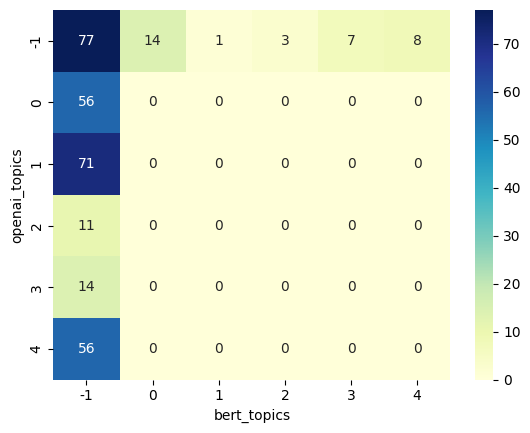

In [40]:
# df where openai or bert topics are -1
a = df[(df['openai_topics'] == -1) | (df['bert_topics'] == -1)]

# confusion matrix of this 
sns.heatmap(pd.crosstab(a['openai_topics'], a['bert_topics']), annot=True, cmap="YlGnBu", fmt='g')


<AxesSubplot: xlabel='my_topics', ylabel='topic'>

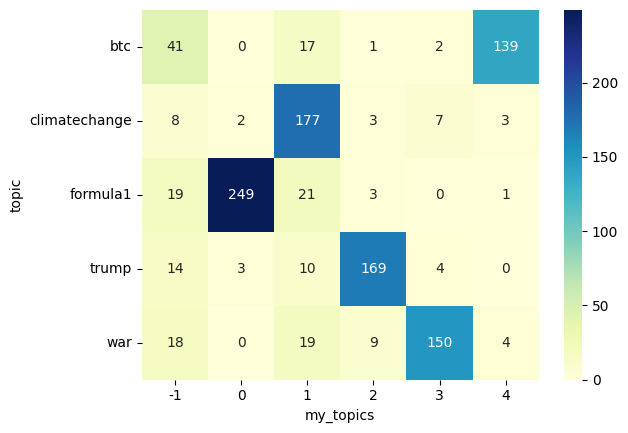

In [5]:
openai_no_hash.visualize_heatmap()

In [7]:
topics = bert_no_hash.df['topic'].unique()
results = {}
results_no_outliers = {}

# compute accuracy for each topic
for topic in topics:
    res = bert_no_hash.df[bert_no_hash.df['topic'] == topic].value_counts('my_topics') 
    # if the biggest label is -1, the second biggest is the right one
    first = res.iloc[0] if res.index[0] != -1 else res.iloc[1]                       # i'm assuming that out of the possible label the right one is the biggest 
    missed = sum(res.iloc[1:]) if res.index[0] != -1 else sum(res) - res.iloc[1]    # sum of the other labels
    outliers = res.loc[-1]

    
    print(topic, first, missed, outliers)
    results[topic] = first / (first + missed)
    results_no_outliers[topic] = first / (first + missed - outliers)  # bertopic mark the outliers with -1, i do not consider them while computing accuracy
        


btc 67 133 111
trump 172 28 19
climatechange 129 71 53
war 151 49 32
formula1 199 94 80


In [9]:
results_no_outliers

{'btc': 0.7528089887640449,
 'trump': 0.9502762430939227,
 'climatechange': 0.8775510204081632,
 'war': 0.8988095238095238,
 'formula1': 0.9342723004694836}

<AxesSubplot: xlabel='my_topics', ylabel='topic'>

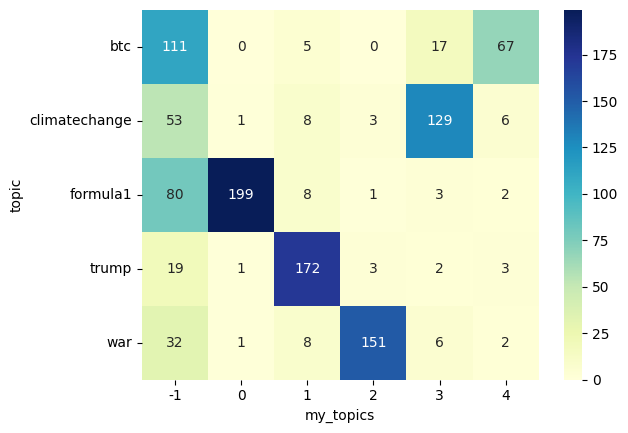

In [6]:
bert_no_hash.visualize_heatmap()